In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import time
import multiprocessing

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import confusion_matrix, r2_score, mean_squared_error
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, precision_recall_curve
import warnings
warnings.filterwarnings("ignore")

C:\Users\USER\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [1]:
df = pd.read_csv(r"C:\Users\USER\Downloads\archive (2)\Train.txt",sep=",",names=["duration","protocoltype","service","flag","srcbytes","dstbytes","land", "wrongfragment","urgent","hot","numfailedlogins","loggedin", "numcompromised","rootshell","suattempted","numroot","numfilecreations", "numshells","numaccessfiles","numoutboundcmds","ishostlogin",
"isguestlogin","count","srvcount","serrorrate", "srvserrorrate",
"rerrorrate","srvrerrorrate","samesrvrate", "diffsrvrate", "srvdiffhostrate","dsthostcount","dsthostsrvcount","dsthostsamesrvrate", "dsthostdiffsrvrate","dsthostsamesrcportrate",
"dsthostsrvdiffhostrate","dsthostserrorrate","dsthostsrvserrorrate",
"dsthostrerrorrate","dsthostsrvrerrorrate","attack", "lastflag"])

<IPython.core.display.Javascript object>

In [2]:
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [3]:
df.shape

(125973, 43)

In [4]:
df.describe

<bound method NDFrame.describe of         duration protocoltype   service flag  srcbytes  dstbytes  land  \
0              0          tcp  ftp_data   SF       491         0     0   
1              0          udp     other   SF       146         0     0   
2              0          tcp   private   S0         0         0     0   
3              0          tcp      http   SF       232      8153     0   
4              0          tcp      http   SF       199       420     0   
...          ...          ...       ...  ...       ...       ...   ...   
125968         0          tcp   private   S0         0         0     0   
125969         8          udp   private   SF       105       145     0   
125970         0          tcp      smtp   SF      2231       384     0   
125971         0          tcp    klogin   S0         0         0     0   
125972         0          tcp  ftp_data   SF       151         0     0   

        wrongfragment  urgent  hot  ...  dsthostsamesrvrate  \
0             

In [ ]:
!pip install tensorflow

In [5]:
df.drop(['land','urgent','numfailedlogins','numoutboundcmds'],axis=1,inplace=True)

In [6]:
df.isna().sum()

duration                  0
protocoltype              0
service                   0
flag                      0
srcbytes                  0
dstbytes                  0
wrongfragment             0
hot                       0
loggedin                  0
numcompromised            0
rootshell                 0
suattempted               0
numroot                   0
numfilecreations          0
numshells                 0
numaccessfiles            0
ishostlogin               0
isguestlogin              0
count                     0
srvcount                  0
serrorrate                0
srvserrorrate             0
rerrorrate                0
srvrerrorrate             0
samesrvrate               0
diffsrvrate               0
srvdiffhostrate           0
dsthostcount              0
dsthostsrvcount           0
dsthostsamesrvrate        0
dsthostdiffsrvrate        0
dsthostsamesrcportrate    0
dsthostsrvdiffhostrate    0
dsthostserrorrate         0
dsthostsrvserrorrate      0
dsthostrerrorrate   

In [8]:
df.select_dtypes(exclude=[np.number])

<IPython.core.display.Javascript object>

,protocoltype,service,flag,attack
0,tcp,ftp_data,SF,normal
1,udp,other,SF,normal
2,tcp,private,S0,neptune
3,tcp,http,SF,normal
4,tcp,http,SF,normal
...,...,...,...,...
125968,tcp,private,S0,neptune
125969,udp,private,SF,normal
125970,tcp,smtp,SF,normal
125971,tcp,klogin,S0,neptune


In [9]:
##Now convert all the name to attack in the attack coloumn
df['attack'].loc[df['attack']!='normal']='attack'

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [10]:
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,wrongfragment,hot,loggedin,numcompromised,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,attack,19
3,0,tcp,http,SF,232,8153,0,0,1,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,1,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [11]:
le=LabelEncoder()

C:\Users\USER\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<IPython.core.display.Javascript object>

In [12]:
## Check thee types of coloumn wwhich are non numeric 
print(df['protocoltype'])
print(df['service'])
print(df['flag'])
print(df['attack'])

0         tcp
1         udp
2         tcp
3         tcp
4         tcp
         ... 
125968    tcp
125969    udp
125970    tcp
125971    tcp
125972    tcp
Name: protocoltype, Length: 125973, dtype: object
0         ftp_data
1            other
2          private
3             http
4             http
            ...   
125968     private
125969     private
125970        smtp
125971      klogin
125972    ftp_data
Name: service, Length: 125973, dtype: object
0         SF
1         SF
2         S0
3         SF
4         SF
          ..
125968    S0
125969    SF
125970    SF
125971    S0
125972    SF
Name: flag, Length: 125973, dtype: object
0         normal
1         normal
2         attack
3         normal
4         normal
           ...  
125968    attack
125969    normal
125970    normal
125971    attack
125972    normal
Name: attack, Length: 125973, dtype: object


In [14]:
##Date transform ussing label encoder
df['protocoltype']=le.fit_transform(df['protocoltype'])
df['service']=le.fit_transform(df['service'])
df['flag']=le.fit_transform(df['flag'])
df['attack']=le.fit_transform(df['attack'])

In [15]:
print(df['protocoltype'])
print(df['service'])
print(df['flag'])
print(df['attack'])

0         1
1         2
2         1
3         1
4         1
         ..
125968    1
125969    2
125970    1
125971    1
125972    1
Name: protocoltype, Length: 125973, dtype: int64
0         20
1         44
2         49
3         24
4         24
          ..
125968    49
125969    49
125970    54
125971    30
125972    20
Name: service, Length: 125973, dtype: int64
0         9
1         9
2         5
3         9
4         9
         ..
125968    5
125969    9
125970    9
125971    5
125972    9
Name: flag, Length: 125973, dtype: int64
0         1
1         1
2         0
3         1
4         1
         ..
125968    0
125969    1
125970    1
125971    0
125972    1
Name: attack, Length: 125973, dtype: int64


In [19]:
pip install pandas-profiling[notebook]


  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\USER\\anaconda3\\Lib\\site-packages\\~umpy.libs\\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff767a3f.dll'
Consider using the `--user` option or check the permissions.



In [ ]:
profileReport(df)

In [21]:
##The code aims to identify pairs of variables that exhibit high linear correlation.
#This information can be valuable for:
#Feature selection: Removing redundant features to reduce model complexity and potential overfitting.
#Understanding relationships between variables: Gaining insights into how different variables interact.
#The choice of correlation threshold (0.95 in this case) can be adjusted based on domain knowledge and analysis goals.
#It's important to visualize the correlation matrix for a more comprehensive understanding of variable relationships.

columns = df.columns.tolist()
corr = df.corr()
correlated_vars = []
for i in range(len(columns) - 1):
    for j in range(i+1, len(columns)):
        if corr[columns[i]][columns[j]] > 0.95:
            print(columns[i], columns[j], corr[columns[i]][columns[j]])
            correlated_vars.append(columns[j])

numcompromised numroot 0.9988334525784719
serrorrate srvserrorrate 0.9932892425370462
serrorrate dsthostserrorrate 0.979373082984311
serrorrate dsthostsrvserrorrate 0.9811389586179897
srvserrorrate dsthostserrorrate 0.9775960119654399
srvserrorrate dsthostsrvserrorrate 0.9862517164931046
rerrorrate srvrerrorrate 0.9890076529820762
rerrorrate dsthostsrvrerrorrate 0.9644486655034351
srvrerrorrate dsthostsrvrerrorrate 0.9702079974522381
dsthostserrorrate dsthostsrvserrorrate 0.9850522227996314


In [22]:
print(correlated_vars)

['numroot', 'srvserrorrate', 'dsthostserrorrate', 'dsthostsrvserrorrate', 'dsthostserrorrate', 'dsthostsrvserrorrate', 'srvrerrorrate', 'dsthostsrvrerrorrate', 'dsthostsrvrerrorrate', 'dsthostsrvserrorrate']


In [23]:
df = df.drop(columns=correlated_vars) 

In [24]:
X=df.drop(['attack'],axis=1)
y=df['attack']

<IPython.core.display.Javascript object>

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='attack', ylabel='count'>

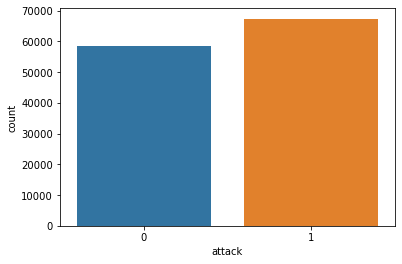

In [25]:
sns.countplot(df['attack'])

In [33]:
scaler = StandardScaler()
scaler.fit(X)
X_transformed = scaler.transform(X)

<IPython.core.display.Javascript object>

In [32]:
test_df = pd.read_csv(r"C:\Users\USER\Downloads\archive (2)\Test.txt",sep=",",names=["duration","protocoltype","service","flag","srcbytes","dstbytes","land", "wrongfragment","urgent","hot","numfailedlogins","loggedin", "numcompromised","rootshell","suattempted","numroot","numfilecreations", "numshells","numaccessfiles","numoutboundcmds","ishostlogin",
"isguestlogin","count","srvcount","serrorrate", "srvserrorrate",
"rerrorrate","srvrerrorrate","samesrvrate", "diffsrvrate", "srvdiffhostrate","dsthostcount","dsthostsrvcount","dsthostsamesrvrate", "dsthostdiffsrvrate","dsthostsamesrcportrate",
"dsthostsrvdiffhostrate","dsthostserrorrate","dsthostsrvserrorrate",
"dsthostrerrorrate","dsthostsrvrerrorrate","attack", "lastflag"])
test_df.head()

<IPython.core.display.Javascript object>

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [34]:
test_df.select_dtypes(exclude=[np.number])

<IPython.core.display.Javascript object>

,protocoltype,service,flag,attack
0,tcp,private,REJ,neptune
1,tcp,private,REJ,neptune
2,tcp,ftp_data,SF,normal
3,icmp,eco_i,SF,saint
4,tcp,telnet,RSTO,mscan
...,...,...,...,...
22539,tcp,smtp,SF,normal
22540,tcp,http,SF,normal
22541,tcp,http,SF,back
22542,udp,domain_u,SF,normal


In [35]:
test_df['attack'].loc[test_df['attack']!='normal']='attack'

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [36]:
test_df.drop(['land','urgent','numfailedlogins','numoutboundcmds'],axis=1,inplace=True)

In [37]:
test_df['protocoltype']=le.fit_transform(test_df['protocoltype'])
test_df['service']=le.fit_transform(test_df['service'])
test_df['flag']=le.fit_transform(test_df['flag'])
test_df['attack']=le.fit_transform(test_df['attack'])

In [38]:
test_df = test_df.drop(columns=correlated_vars) 

In [39]:
X_test=test_df.drop(['attack'],axis=1)
y_test=test_df['attack']

<IPython.core.display.Javascript object>

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='attack', ylabel='count'>

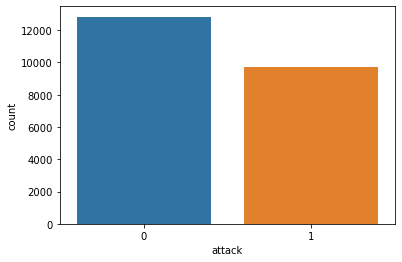

In [40]:
sns.countplot(test_df['attack'])

In [41]:
X_test_transformed = scaler.transform(X_test)

Radom Forest

In [42]:
rf=RandomForestClassifier()
rf.fit(X_transformed,y)
test_pred=rf.predict(X_test_transformed)

<IPython.core.display.Javascript object>

In [43]:
rf_test_df=pd.DataFrame()
rf_test_df['actual']=y_test
rf_test_df['pred']=test_pred

<IPython.core.display.Javascript object>

In [44]:
rf_test_df.head()

,actual,pred
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0


In [45]:
target_names=["attack","normal"]

In [47]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, precision_recall_curve

In [48]:
ascore = accuracy_score(y_test, test_pred)
pscore = precision_score(y_test, test_pred)
rscore = recall_score(y_test, test_pred)
fscore = f1_score(y_test, test_pred)

print("accuracy score: {}".format(ascore))
print("precision score: {}".format(pscore))
print("recall score: {}".format(rscore))
print("f1 score: {}".format(fscore))

accuracy score: 0.8155163236337828
precision score: 0.7081271554955766
recall score: 0.9726083822469365
f1 score: 0.8195583322486876


Logistic Regression

In [49]:
lr=LogisticRegression() # creates an instance of the Logistic Regression model. 
lr.fit(X_transformed,y)
test_pred=lr.predict(X_test_transformed)

<IPython.core.display.Javascript object>

In [50]:
ascore = accuracy_score(y_test, test_pred)
pscore = precision_score(y_test, test_pred)
rscore = recall_score(y_test, test_pred)
fscore = f1_score(y_test, test_pred)

print("accuracy score: {}".format(ascore))
print("precision score: {}".format(pscore))
print("recall score: {}".format(rscore))
print("f1 score: {}".format(fscore))

accuracy score: 0.8478974449964514
precision score: 0.7691978059650326
recall score: 0.9242096591494182
f1 score: 0.8396089620655784


Support Vector Machine(SVM)

In [52]:
from sklearn.svm import SVC

In [53]:
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_transformed, y)
test_pred=svm_model.predict(X_test_transformed)

In [55]:
ascore = accuracy_score(y_test, test_pred)
pscore = precision_score(y_test, test_pred)
rscore = recall_score(y_test, test_pred)
fscore = f1_score(y_test, test_pred)

print("accuracy score: {}".format(ascore))
print("precision score: {}".format(pscore))
print("recall score: {}".format(rscore))
print("f1 score: {}".format(fscore))

accuracy score: 0.8520227111426544
precision score: 0.7569942755784891
recall score: 0.9668417258778704
f1 score: 0.8491453377950621


Here we can see SVM is best in Score or Accuracy

In [57]:
import pickle

In [61]:
pickle.dump(svm_model,open("Anamoly.pkl","wb"))

In [63]:
Anamoly_model = pickle.load(open("Anamoly.pkl","rb"))